In [6]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [7]:
tf.__version__

'2.5.0'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("Covid19-dataset/train/",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 251 images belonging to 3 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("Covid19-dataset/test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 66 images belonging to 3 classes.


In [8]:
cnn = tf.keras.models.Sequential()

Metal device set to: Apple M1


2022-08-06 18:41:53.008680: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-06 18:41:53.009062: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [15]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

2022-08-06 18:43:40.920788: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-06 18:43:40.921185: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-06 18:43:41.075334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25
8/8 [==============================] - ETA: 0s - loss: 1.1580 - accuracy: 0.4223

2022-08-06 18:43:49.101275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 9s 786ms/step - loss: 1.1580 - accuracy: 0.4223 - val_loss: 0.8327 - val_accuracy: 0.8182
Epoch 2/25
8/8 [==============================] - 6s 707ms/step - loss: 0.7758 - accuracy: 0.7689 - val_loss: 0.5853 - val_accuracy: 0.8030
Epoch 3/25
8/8 [==============================] - 6s 719ms/step - loss: 0.5781 - accuracy: 0.8088 - val_loss: 0.4715 - val_accuracy: 0.7727
Epoch 4/25
8/8 [==============================] - 6s 716ms/step - loss: 0.5069 - accuracy: 0.8048 - val_loss: 0.3584 - val_accuracy: 0.8030
Epoch 5/25
8/8 [==============================] - 6s 694ms/step - loss: 0.4053 - accuracy: 0.8406 - val_loss: 0.4589 - val_accuracy: 0.8333
Epoch 6/25
8/8 [==============================] - 6s 725ms/step - loss: 0.4102 - accuracy: 0.8367 - val_loss: 0.3372 - val_accuracy: 0.8788
Epoch 7/25
8/8 [==============================] - 6s 708ms/step - loss: 0.3035 - accuracy: 0.8805 - val_loss: 0.3051 - val_accuracy: 0.8939
Epoch 8/25
8/8 [===============

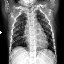

In [24]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img("Covid19-dataset/test/Normal/0109.jpeg", target_size = (64, 64))
test_image





In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img("Covid19-dataset/test/Normal/0117.jpeg" , target_size = (64, 64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)


result = cnn.predict(test_image)

result=result.astype(int)
Y=training_set.class_indices
j=0
i = 0
while i < 3:
    
    if result[0][i] == 1:
        break
    i=i+1
print(i)
j=i
if j == 0:
 prediction = 'covid'
    
elif j == 1:
 prediction = 'normal'
elif j == 2:
 prediction = 'viral'


1


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img("Covid19-dataset/test/Viral Pneumonia/0102.jpeg" , target_size = (64, 64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)


result = cnn.predict(test_image)

result=result.astype(int)
Y=training_set.class_indices
j=0
i = 0
while i < 3:
    
    if result[0][i] == 1:
        break
    i=i+1
print(i)
j=i
if j == 0:
 prediction = 'covid'
    
elif j == 1:
 prediction = 'normal'
elif j == 2:
 prediction = 'viral'


2
